In [1]:
import pylab as py
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.patches as mpatches


## Initial Conditions

In [2]:
c = 10 
gL = 19
eL = -67
gNa = 74
Vstar = 1.5
k = 16
eNa = 60
I = 6
step1 = 1
step01 = 0.1
step001 = 0.001

In [3]:
def dVdt(v): 
    m = (1/(1+math.exp((Vstar-v)/k)))
    dVdt = (I-(gL*(v-eL))-((gNa*m)*(v-eNa)))/c
    
    return dVdt

y = (6-(19*(x+67))-((74*(1/(1+e^((1.5-x)/16)))*(x-60)))/16

## Euler's Method

In [16]:
vEuler01 = ([0]*101)
vEuler001 = ([0]*1001)

#Euler's method cannot be calculated given step = 1

for i in range(len(vEuler01)-1): 
    vEuler01[i+1] = vEuler01[i] + step01*dVdt(vEuler01[i])

    
print(vEuler01)
for i in range(len(vEuler001)-1):
    vEuler001[i+1] = vEuler001[i] + step001*dVdt(vEuler001[i])


[0, 8.490136507227218, 17.363886774025524, 24.407300446533387, 28.359561133344148, 30.032985527379832, 30.64135900061688, 30.849117596193967, 30.918493975707815, 30.94148496597296, 30.94908475721794, 30.951594797343944, 30.95242357692681, 30.95269720306877, 30.952787539509977, 30.952817363381897, 30.952827209468243, 30.952830460062632, 30.95283153321593, 30.952831887507404, 30.952832004473397, 30.95283204308862, 30.95283205583707, 30.95283206004585, 30.95283206143534, 30.952832061894068, 30.952832062045513, 30.952832062095506, 30.952832062112012, 30.952832062117462, 30.952832062119263, 30.952832062119857, 30.952832062120052, 30.95283206212012, 30.95283206212014, 30.95283206212015, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.952832062120148, 30.9528320

## Runge Kutta

In [15]:
vRunge = ([0]*11)
vRunge1= ([0]*101)
vRunge2= ([0]*1001)

for i in range(len(vRunge)-1): 
    k1 = step1*dVdt(vRunge[i])
    k2 = step1*dVdt(vRunge[i]+(k1/2))
    k3 = step1*dVdt(vRunge[i]+(k2/2))
    k4 = step1*(dVdt(vRunge[i]+k3))
    vRunge[i+1] = vRunge[i] + (1/6)*(k1+(2*k2)+(2*k3)+k4)

for i in range(len(vRunge1)-1):    
    k11 = step01*(dVdt(vRunge1[i]))
    k22 = step01*(dVdt(vRunge1[i]+(k11/2)))
    k33 = step01*(dVdt(vRunge1[i]+(k22/2)))
    k44 = step01*(dVdt(vRunge1[i]+k33))
    vRunge1[i+1] = vRunge1[i] + (1/6)*(k11+(2*k22)+(2*k33)+k44)
  
for i in range(len(vRunge2)-1): 
    k111 = step001*(dVdt(vRunge2[i]))
    k222 = step001*(dVdt(vRunge2[i]+(k111/2)))
    k333 = step001*(dVdt(vRunge2[i]+(k222/2)))
    k444 = step001*(dVdt(vRunge2[i]+k333))
    vRunge2[i+1] = vRunge2[i] + (1/6)*(k111+(2*k222)+(2*k333)+k444)

## ode45

In [6]:
def dVdt_t(v,t): 
    m = (1/(1+math.exp((Vstar-v)/k)))
    dVdt = (I-(gL*(v-eL))-((gNa*m)*(v-eNa)))/c
    
    return dVdt

In [7]:
xs = np.linspace(0,10,11)
xss = np.linspace(0,10,101)
xsss = np.linspace(0,10,1001)
yode = odeint(dVdt_t,0,xs)
yode1 = odeint(dVdt_t,0,xss)
yode2 = odeint(dVdt_t,0,xsss)

In [8]:
#Graphing info
blue_patch = mpatches.Patch(color='blue', label='Runge Kutta')
green_patch = mpatches.Patch(color='green', label='ODE45')
red_patch = mpatches.Patch(color='red', label='Eulers Method')

## Euler’s method has failed 

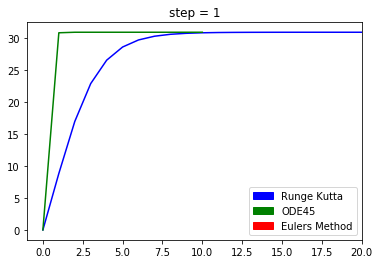

In [9]:
py.plot(vRunge1,'b')
py.plot(yode,'g')
plt.xlim(-1,20)
py.title('step = 1')
plt.legend(handles=[blue_patch,green_patch,red_patch])

## All methods agree with eachother

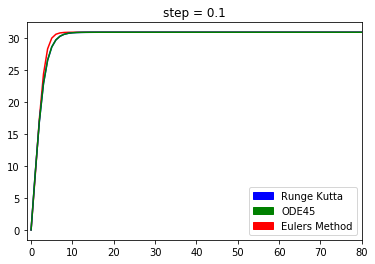

In [10]:
py.plot(vEuler01,'r')
py.plot(vRunge1,'b')
py.plot(yode1,'g')
plt.xlim(-1,80)
py.title('step = 0.1')
plt.legend(handles=[blue_patch,green_patch,red_patch])

## Euler’s method and Runge-Kutta have failed

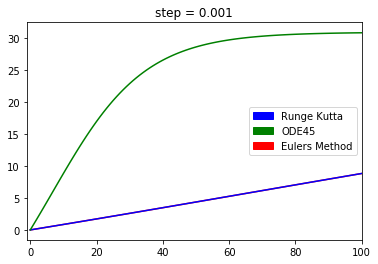

In [11]:
py.plot(vEuler001,'r')
py.plot(vRunge2,'b')
py.plot(yode2,'g')
plt.xlim(-1,100)
py.title('step = 0.001')
plt.legend(handles=[blue_patch,green_patch,red_patch])